In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

***Data Exploration***

In [2]:
#Loading the dataframe
hpc = pd.read_csv('C:/GUVI/Projects/03_Energy_Consumption/Data/household_power_consumption.txt', delimiter=';', encoding='utf-8')  
print("List of columns in dataset:  \n",hpc.columns)
print("\nNo of rows/columns in dataset:  \n",hpc.shape)

List of columns in dataset:  
 Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

No of rows/columns in dataset:  
 (2075259, 9)


C:\Users\sindh\AppData\Local\Temp\ipykernel_1836\2014173963.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  hpc = pd.read_csv('C:/GUVI/Projects/03_Energy_Consumption/Data/household_power_consumption.txt', delimiter=';', encoding='utf-8')


In [3]:
hpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
hpc.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


***Data Cleaning/Pre-processing***

**Invalid Data Type handling**

1. Since all the datatypes are object except sub_metering_3 from columns 2-7, converted them to Numeric column as per the data it holds.
2. Merged Date and Time into a single column and changed the datatype as datetime format instead of string
3. While data type conversion, spotted the special character ? in data. So, removed the same.


In [5]:
hpc.replace("?", np.nan, inplace=True)

# Handling DataTypes 
col_convert = hpc.columns[2:8]
for col in col_convert:
    hpc[col] = pd.to_numeric(hpc[col])

#Parse DateTime
hpc['Datetime'] = pd.to_datetime(hpc['Date'] + ' ' + hpc['Time'], errors='coerce',dayfirst=True)
hpc = hpc.drop(columns=['Date', 'Time'])
hpc = hpc[['Datetime'] + [col for col in hpc.columns if col != 'Datetime']]
hpc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


***Handling Null Values***

In [6]:
#Checking for null values
hpc.isnull().sum()

Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
#Create a backup of the original data before interpolation
hpc_before = hpc.copy()

***Null Imputation with Interpolation***

In [8]:
# Null Imputation 
# Extract time-based features from 'Datetime'
hpc['Hour'] = hpc['Datetime'].dt.hour
hpc['Day'] = hpc['Datetime'].dt.day
hpc['DayOfWeek'] = hpc['Datetime'].dt.dayofweek
hpc['Month'] = hpc['Datetime'].dt.month
hpc['Year'] = hpc['Datetime'].dt.year
hpc['IsWeekend'] = hpc['DayOfWeek'].isin([5, 6]).astype(int)

hpc.set_index('Datetime', inplace=True)

# Interpolate missing values based on time
hpc.interpolate(method='time', inplace=True)
hpc.reset_index(inplace=True)

In [9]:
hpc.isnull().sum()

Datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Hour                     0
Day                      0
DayOfWeek                0
Month                    0
Year                     0
IsWeekend                0
dtype: int64

***Distribution should be similar before and after interpolation and there should not be much difference***

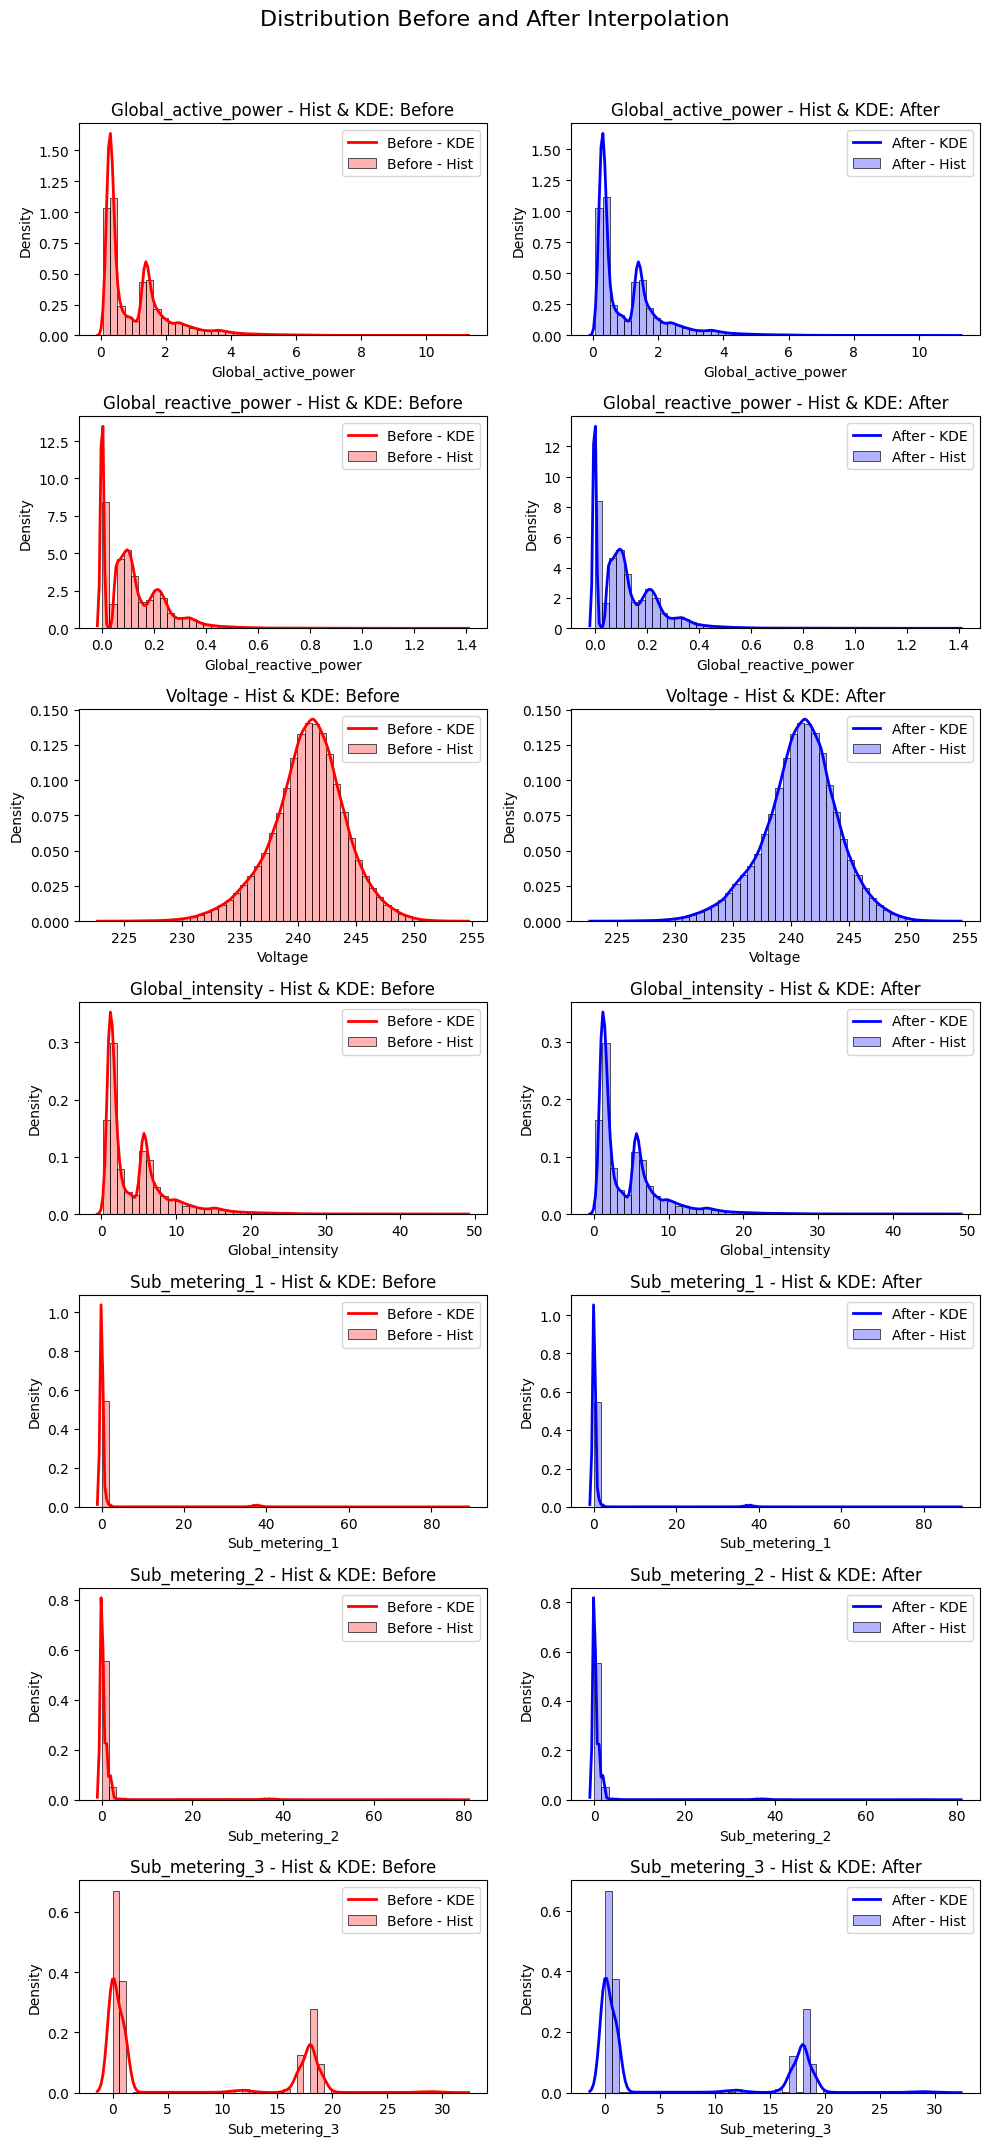

In [10]:
# List of numeric columns to plot
cols_to_plot = hpc.columns[1:8]

# Set up subplots
fig, axes = plt.subplots(len(cols_to_plot), 2, figsize=(10, 3 * len(cols_to_plot)))
fig.suptitle('Distribution Before and After Interpolation', fontsize=16, y=1.02)

for i, col in enumerate(cols_to_plot):

    # Before interpolation
    sns.histplot(hpc_before[col], ax=axes[i,0], color='red', bins=50, kde=False, stat='density', alpha=0.3, label='Before - Hist')
    sns.kdeplot(hpc_before[col], ax=axes[i,0], color='red', label='Before - KDE', linewidth=2)
    axes[i,0].set_title(f'{col} - Hist & KDE: Before')
    axes[i,0].legend()

    # After interpolation
    sns.histplot(hpc[col], ax=axes[i,1], color='blue', bins=50, kde=False, stat='density', alpha=0.3, label='After - Hist')
    sns.kdeplot(hpc[col], ax=axes[i,1], color='blue', label='After - KDE', linewidth=2)
    axes[i,1].set_title(f'{col} - Hist & KDE: After')
    axes[i,1].legend()

plt.tight_layout()
plt.show()

***Checking for Duplicates***

In [11]:
#Duplicate Checking
hpc.duplicated().sum()

np.int64(0)

*Above output infers that there are no duplicate rows in our dataframe*

In [12]:
hpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   Hour                   int32         
 9   Day                    int32         
 10  DayOfWeek              int32         
 11  Month                  int32         
 12  Year                   int32         
 13  IsWeekend              int64         
dtypes: datetime64[ns](1), float64(7), int32(5), int64(1)
memory usage: 182.1 MB


***Summary Statistics***

In [13]:
hpc.describe()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,DayOfWeek,Month,Year,IsWeekend
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-06 07:12:59.999994112,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00,1.150076e+01,1.577363e+01,2.998909e+00,6.450359e+00,2.008437e+03,2.853793e-01
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03,0.000000e+00
25%,2007-12-12 00:18:30,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.000000e+00,3.000000e+00,2.007000e+03,0.000000e+00
50%,2008-12-06 07:13:00,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,1.600000e+01,3.000000e+00,6.000000e+00,2.008000e+03,0.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.800000e+01,2.300000e+01,5.000000e+00,9.000000e+00,2.009000e+03,1.000000e+00
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2.300000e+01,3.100000e+01,6.000000e+00,1.200000e+01,2.010000e+03,1.000000e+00
std,NaN,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00,6.922227e+00,8.787773e+00,2.000064e+00,3.415762e+00,1.128677e+00,4.515950e-01


In [14]:
#Skewness Checking
skew_values = hpc[cols_to_plot].skew()
print(skew_values)

Global_active_power      1.791581
Global_reactive_power    1.263040
Voltage                 -0.324918
Global_intensity         1.855325
Sub_metering_1           5.984475
Sub_metering_2           7.136054
Sub_metering_3           0.729779
dtype: float64


****Data Analysis -****
**Univariate Analysis With KDE plot & Histogram**

Univariate Analysis helps us to understand the data distribution of each feature/columns.

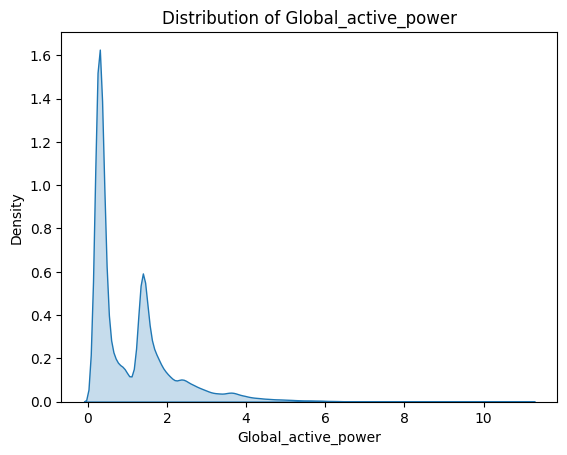

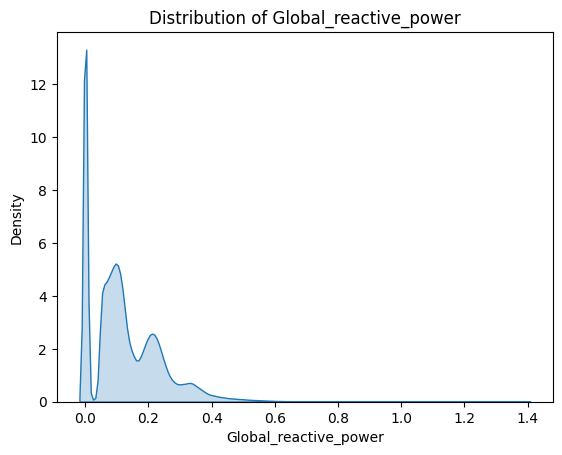

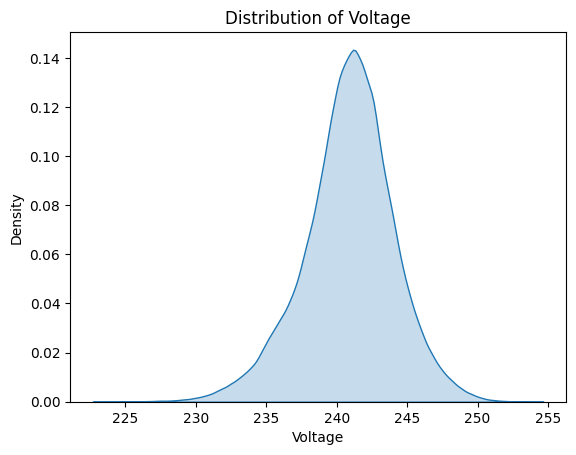

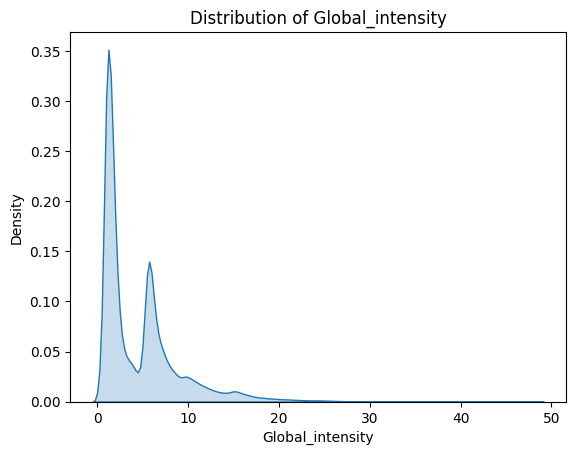

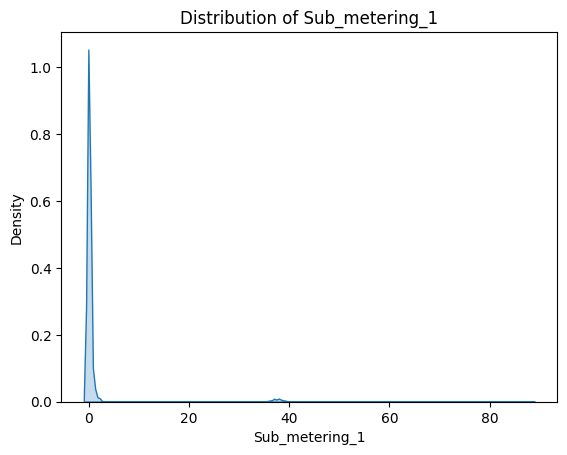

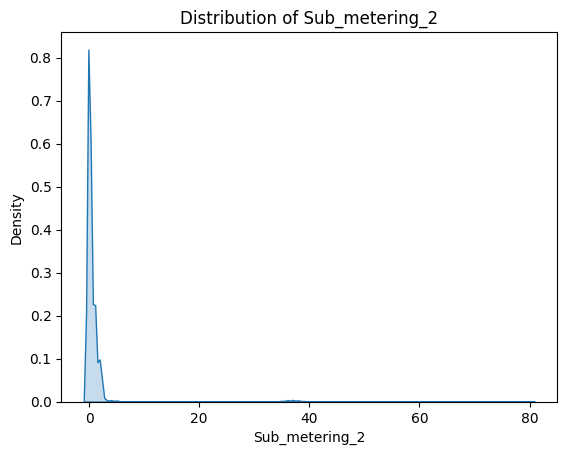

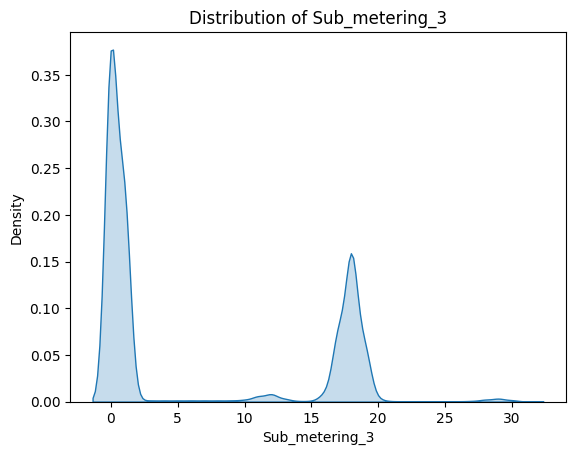

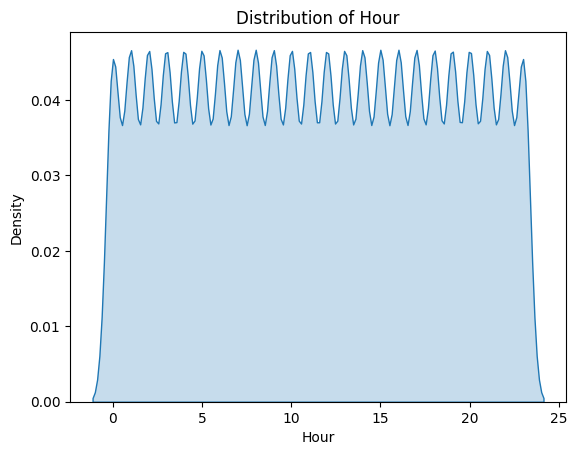

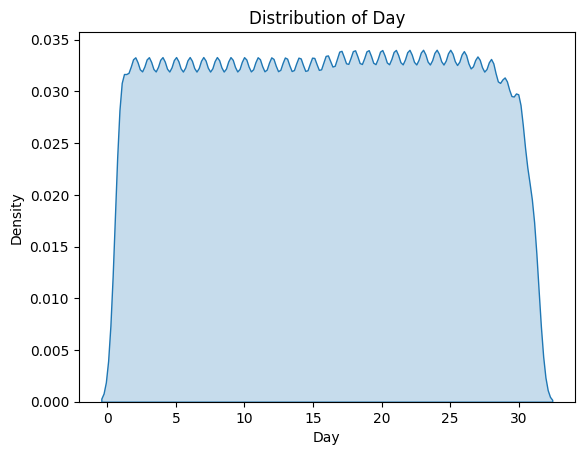

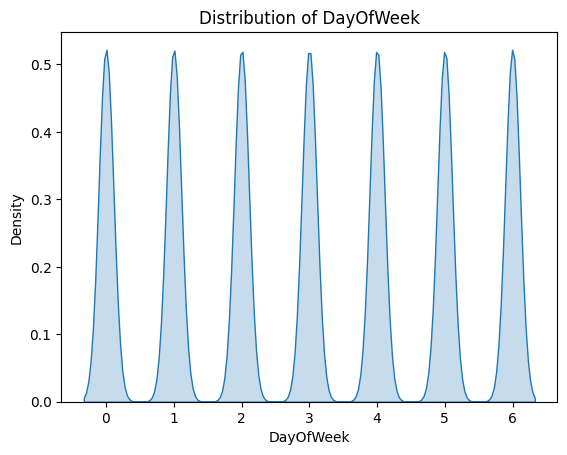

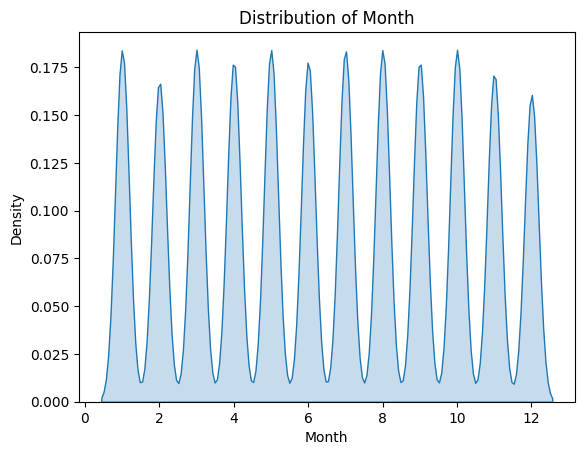

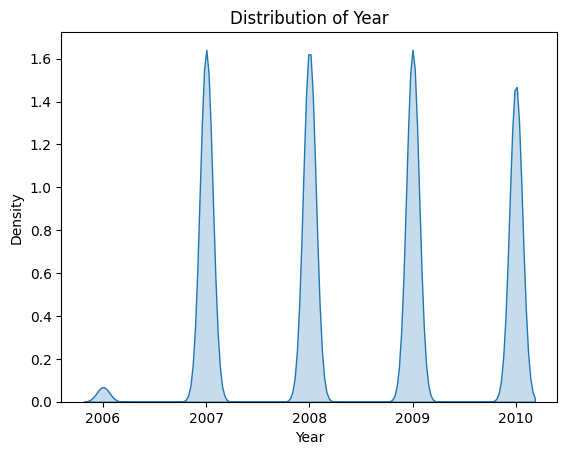

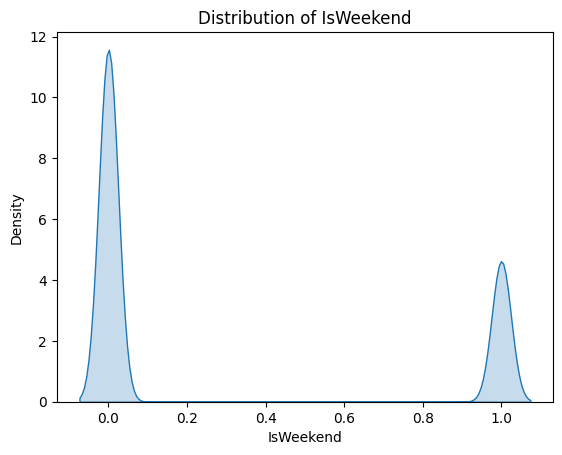

In [15]:
##Univariate Analysis
# KDE plots
for col in hpc.columns[1:]:
    sns.kdeplot(hpc[col],fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

***Insights From Univariate Analysis***
1. Datetime - Data collection appears complete and uniformly spaced over time.
2. Global Active power - Data is right skewed, majority of values lie between 0-2Kw snd few values in 2-4 Kw. This shows low to moderate energy consumption.
3. Global Reactive Power - Data is right skewed, 0-0.3kw. Peaks may correspond to the use of appliances with motors.
4. Voltage - Data is uniformly distributed. Voltage is Stable and ranges from 235-245V
5. Global Intensity - Data is right skewed with values in 10A mostly. High intensity is rare which means appliances draw low current.
6. Sub_metering_1 - Sharp spike at 0 and appliances metered here drawn low energy consumption. May be appliances are OFF most of the time.
7. Sub_metering_2 - Sharp spike at 0 and appliances metered here used infrequently.
8. Sub_metering_3 - Data falls mostly in 17W, which shows appliances which are using consistently( Eg., Fridge which is used 24/7).   

****Data Analysis -****
**Bi-variate Analysis With HeatMap**

Bi-variate Analysis helps to understand the relation between a pair of variables.

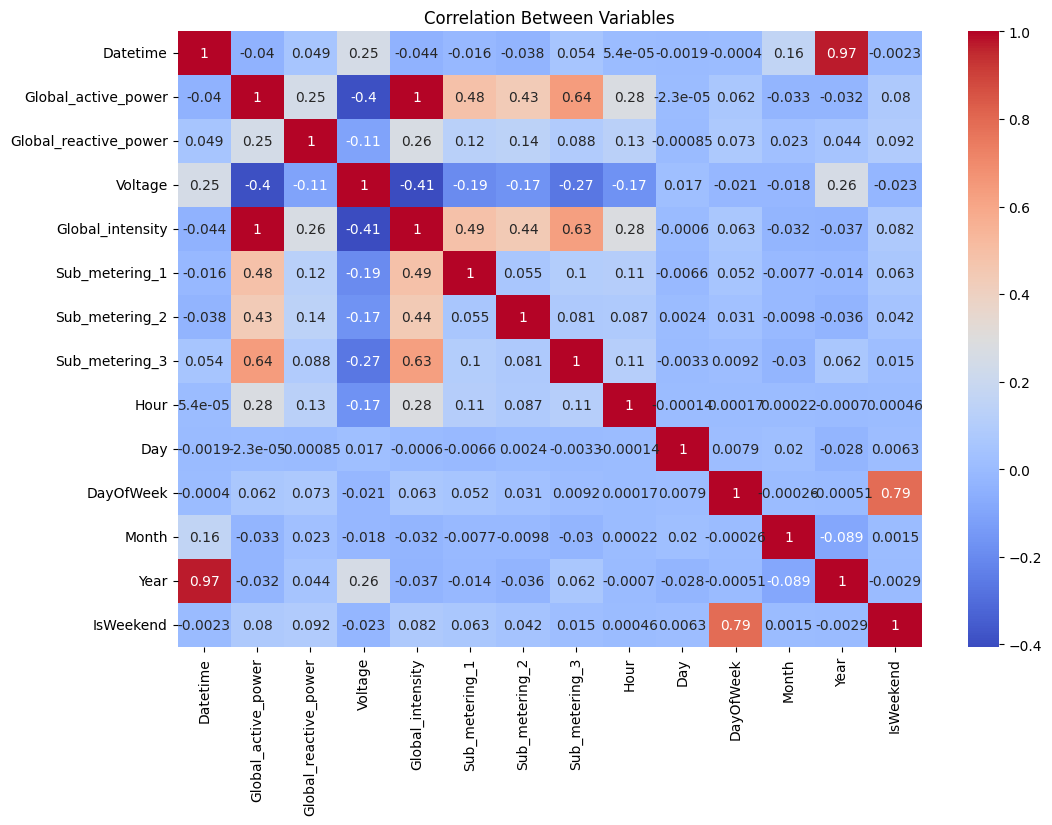

In [16]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(hpc.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

**Insights from HeatMap**

1. Strong Positive Correlation - Global_active_power & Sub_metering_1/2/3, Global_active_power & Global_intensity, Global_intensity & Sub_metering_1/2/3.
2. Negative Correlation - Voltage & Global_active_power/Global_intensity/Sub_metering_3.
3. Low Correlation - No strong trend between datetime and other variables. 
4. Global_active_power (Target variable) is highly correlated with Sub_metering_1/2/3 and Global_reactive_power.

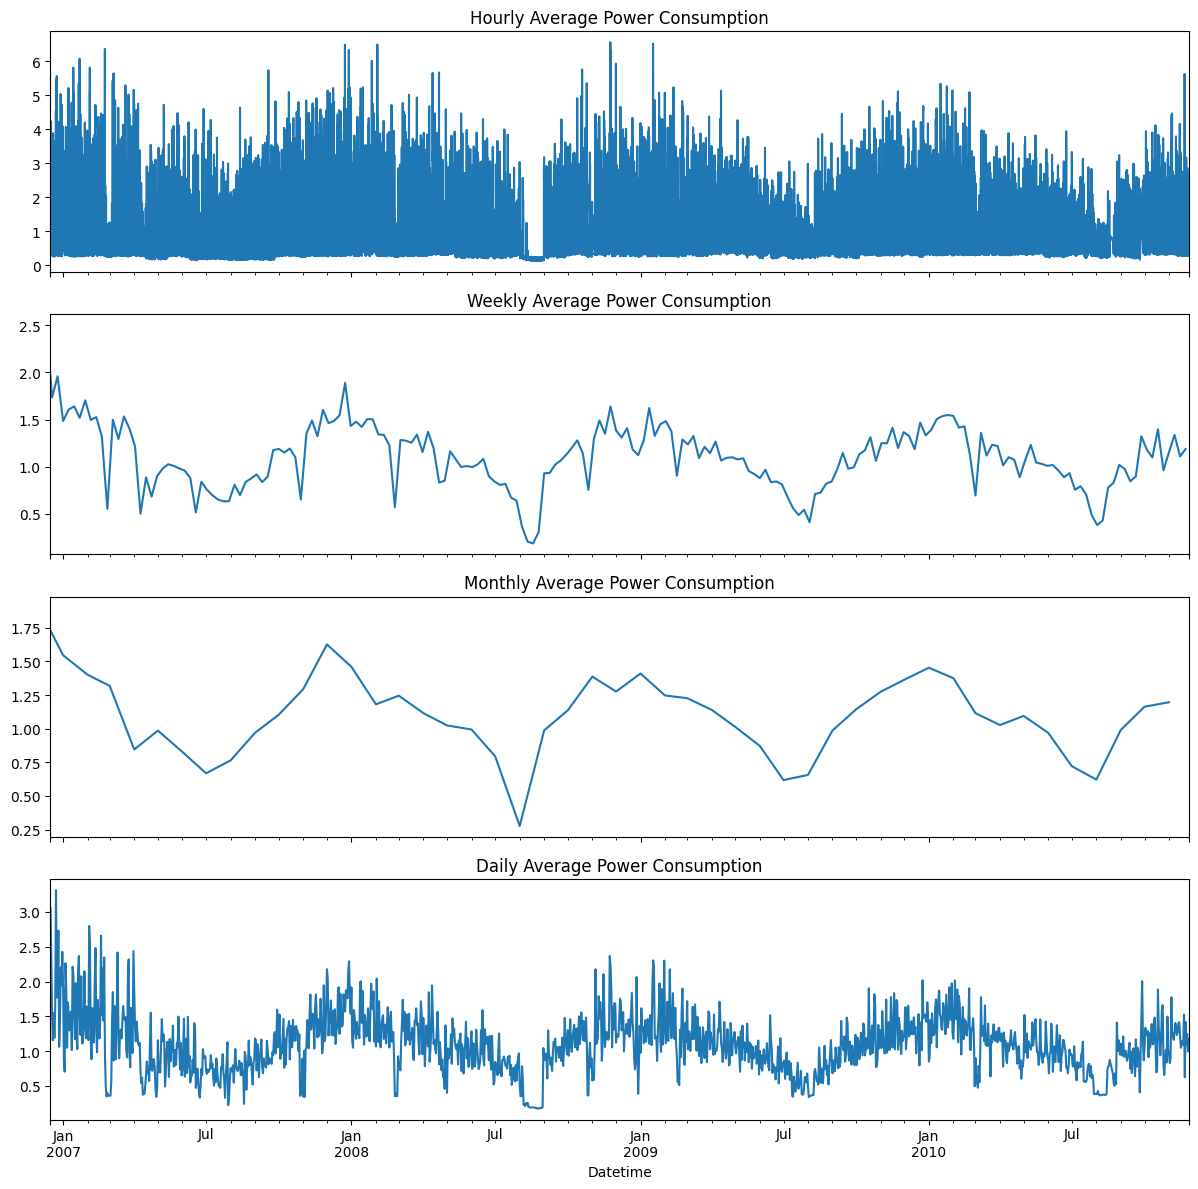

In [17]:
# Lineplot of Sub Metering vs Time
# Example: Resample to daily average
hpc.set_index('Datetime',inplace=True)
hourly_avg = hpc['Global_active_power'].resample('h').mean()
weekly_avg = hpc['Global_active_power'].resample('W').mean()
monthly_avg = hpc['Global_active_power'].resample('ME').mean()
daily_avg = hpc['Global_active_power'].resample('D').mean()

# Plot
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
hourly_avg.plot(ax=axs[0], title='Hourly Average Power Consumption')
weekly_avg.plot(ax=axs[1], title='Weekly Average Power Consumption')
monthly_avg.plot(ax=axs[2], title='Monthly Average Power Consumption')
daily_avg.plot(ax=axs[3], title='Daily Average Power Consumption')

plt.tight_layout()
plt.show()

**Insights from Daily Avg. Energy Consumption**

1. Captures both long-term trends and short-term fluctuations.
2. A noticeable downward trend in consumption is seen after 2007, suggesting improved energy efficiency or reduced appliance usage.
3. High variability - Multiple spikes and dips: Possibly indicating weekends, holidays, or unusual weather patterns.

**Insights from Hourly Avg. Energy Consumption**

1. Noise level is high, making long-term trends hard to detect.
2. Reflects the daily activity patterns: spikes during mornings and evenings (cooking, heating, etc.).

**Insights from Weekly Avg. Energy Consumption**

1. A smoother line — weekly aggregation removes short-term fluctuations.
2. Shows seasonal variation: drops and rises that may correspond to colder vs. warmer weeks.
3. Easier to observe weekly cycles or shifts in average usage.

**Insights from Monthly Avg. Energy Consumption**

1. This is the smoothest trend, clearly highlighting seasonal patterns.
2. You can see repeating low and high months, likely reflecting heating (winter) and cooling (summer) demands.
3. Sharp dips likely correspond to data gaps or anomalies.
4. Cyclic trend is visible: Energy usage shows seasonal variations, possibly due to weather-related heating/cooling needs.


In [18]:
hpc=hpc.reset_index()
hpc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,DayOfWeek,Month,Year,IsWeekend
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,5,12,2006,1
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,5,12,2006,1
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,5,12,2006,1
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,5,12,2006,1
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,5,12,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,26,4,11,2010,0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,26,4,11,2010,0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,26,4,11,2010,0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,21,26,4,11,2010,0


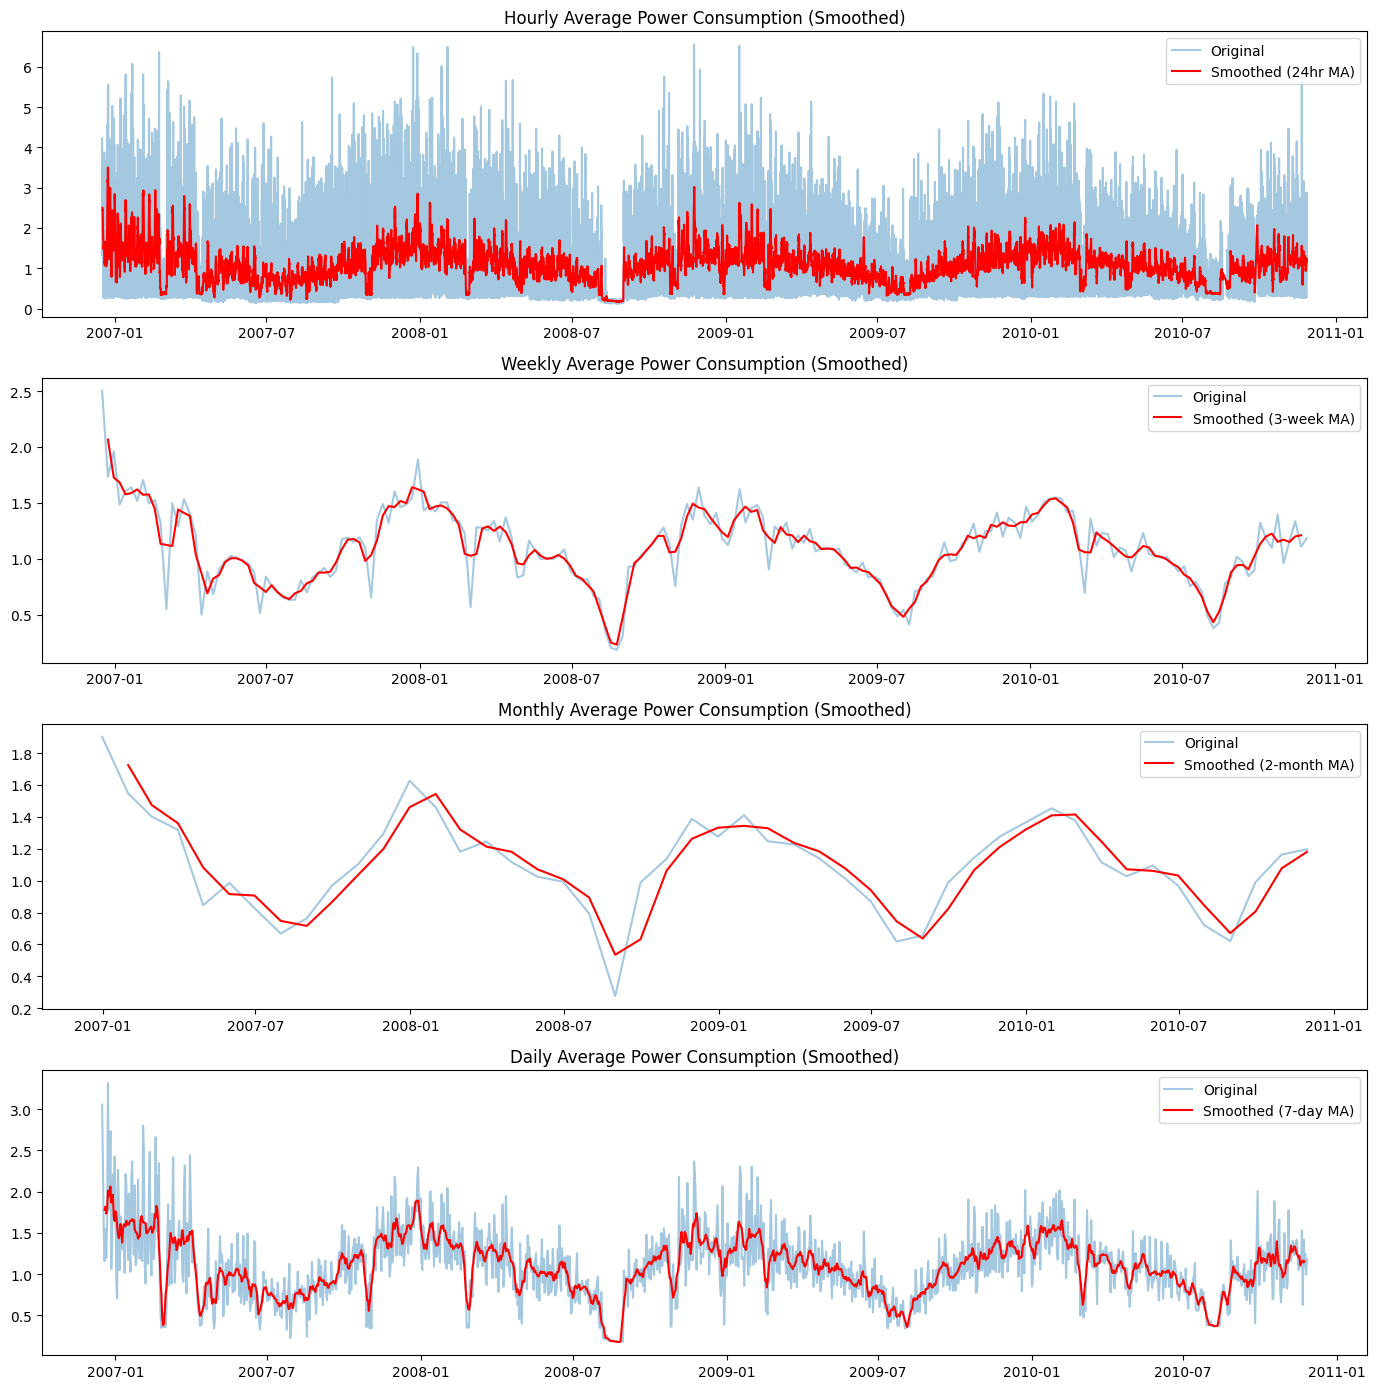

In [19]:
# Apply smoothing on resampled averages
daily_smoothed = daily_avg.rolling(window=7, center=True).mean()        # 7-day moving average
weekly_smoothed = weekly_avg.rolling(window=3, center=True).mean()      # 3-week moving average
monthly_smoothed = monthly_avg.rolling(window=2, center=True).mean()    # 2-month moving average
hourly_smoothed = hourly_avg.rolling(window=24, center=True).mean()     # 24-hour (1-day) moving average

# Plot smoothed data
fig, axs = plt.subplots(4, 1, figsize=(14, 14), sharex=False)

# Hourly
axs[0].plot(hourly_avg, label='Original', alpha=0.4)
axs[0].plot(hourly_smoothed, label='Smoothed (24hr MA)', color='red')
axs[0].set_title('Hourly Average Power Consumption (Smoothed)')
axs[0].legend()

# Weekly
axs[1].plot(weekly_avg, label='Original', alpha=0.4)
axs[1].plot(weekly_smoothed, label='Smoothed (3-week MA)', color='red')
axs[1].set_title('Weekly Average Power Consumption (Smoothed)')
axs[1].legend()

# Monthly
axs[2].plot(monthly_avg, label='Original', alpha=0.4)
axs[2].plot(monthly_smoothed, label='Smoothed (2-month MA)', color='red')
axs[2].set_title('Monthly Average Power Consumption (Smoothed)')
axs[2].legend()

# Daily
axs[3].plot(daily_avg, label='Original', alpha=0.4)
axs[3].plot(daily_smoothed, label='Smoothed (7-day MA)', color='red')
axs[3].set_title('Daily Average Power Consumption (Smoothed)')
axs[3].legend()

plt.tight_layout()
plt.show()



**Insights From Rolling Data in Energy Consumption**

1. The 7-day moving average clearly highlights the seasonal patterns and long-term trend.
2. There are repeated dips and recoveries, often in colder months (indicating heating use).
3. This smoothing helps identify cyclic usage patterns across hours/weeks/monthly/daily, better than the raw daily data alone.

<Axes: xlabel='Day', ylabel='Hour'>

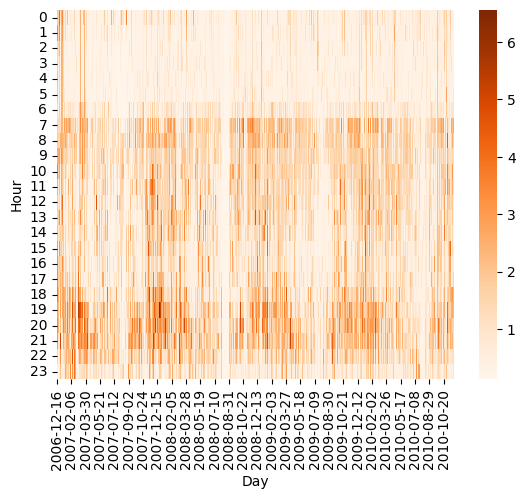

In [20]:
hpc.set_index('Datetime',inplace=True)
hpc['Hour'] = hpc.index.hour
hpc['Day'] = hpc.index.date
hpc['DayOfWeek'] = hpc.index.dayofweek
hpc['Month'] = hpc.index.month
hpc['Year'] = hpc.index.year
hpc['IsWeekend'] = hpc['DayOfWeek'].isin([5, 6]).astype(int)
pivot = hpc.pivot_table(index='Hour', columns='Day', values='Global_active_power')
sns.heatmap(pivot, cmap='Oranges')

**Insights from hourly Power consumption across the days (Peak Hours)**
1. Energy usage peaks between 6 AM and 9 AM and again from 6 PM to 9 PM, typical for residential usage patterns (cooking, heating, lighting).
2. Very low usage between midnight and early morning hours, as expected.
3. Some darker streaks suggest high-demand days or weeks (possibly winters or holidays).
4. There's a cyclical intensity - certain days consistently show more usage, possibly weekdays vs weekends or seasonal effects.

In [21]:
hpc=hpc.reset_index()
hpc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,DayOfWeek,Month,Year,IsWeekend
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,2006-12-16,5,12,2006,1
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,2006-12-16,5,12,2006,1
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,2006-12-16,5,12,2006,1
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,2006-12-16,5,12,2006,1
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,2006-12-16,5,12,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,2010-11-26,4,11,2010,0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,2010-11-26,4,11,2010,0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,2010-11-26,4,11,2010,0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,21,2010-11-26,4,11,2010,0


****Data Analysis -****
**MultiVariate Analysis**

 It helps in understanding relationships, patterns, and dependencies among different variables in a dataset.

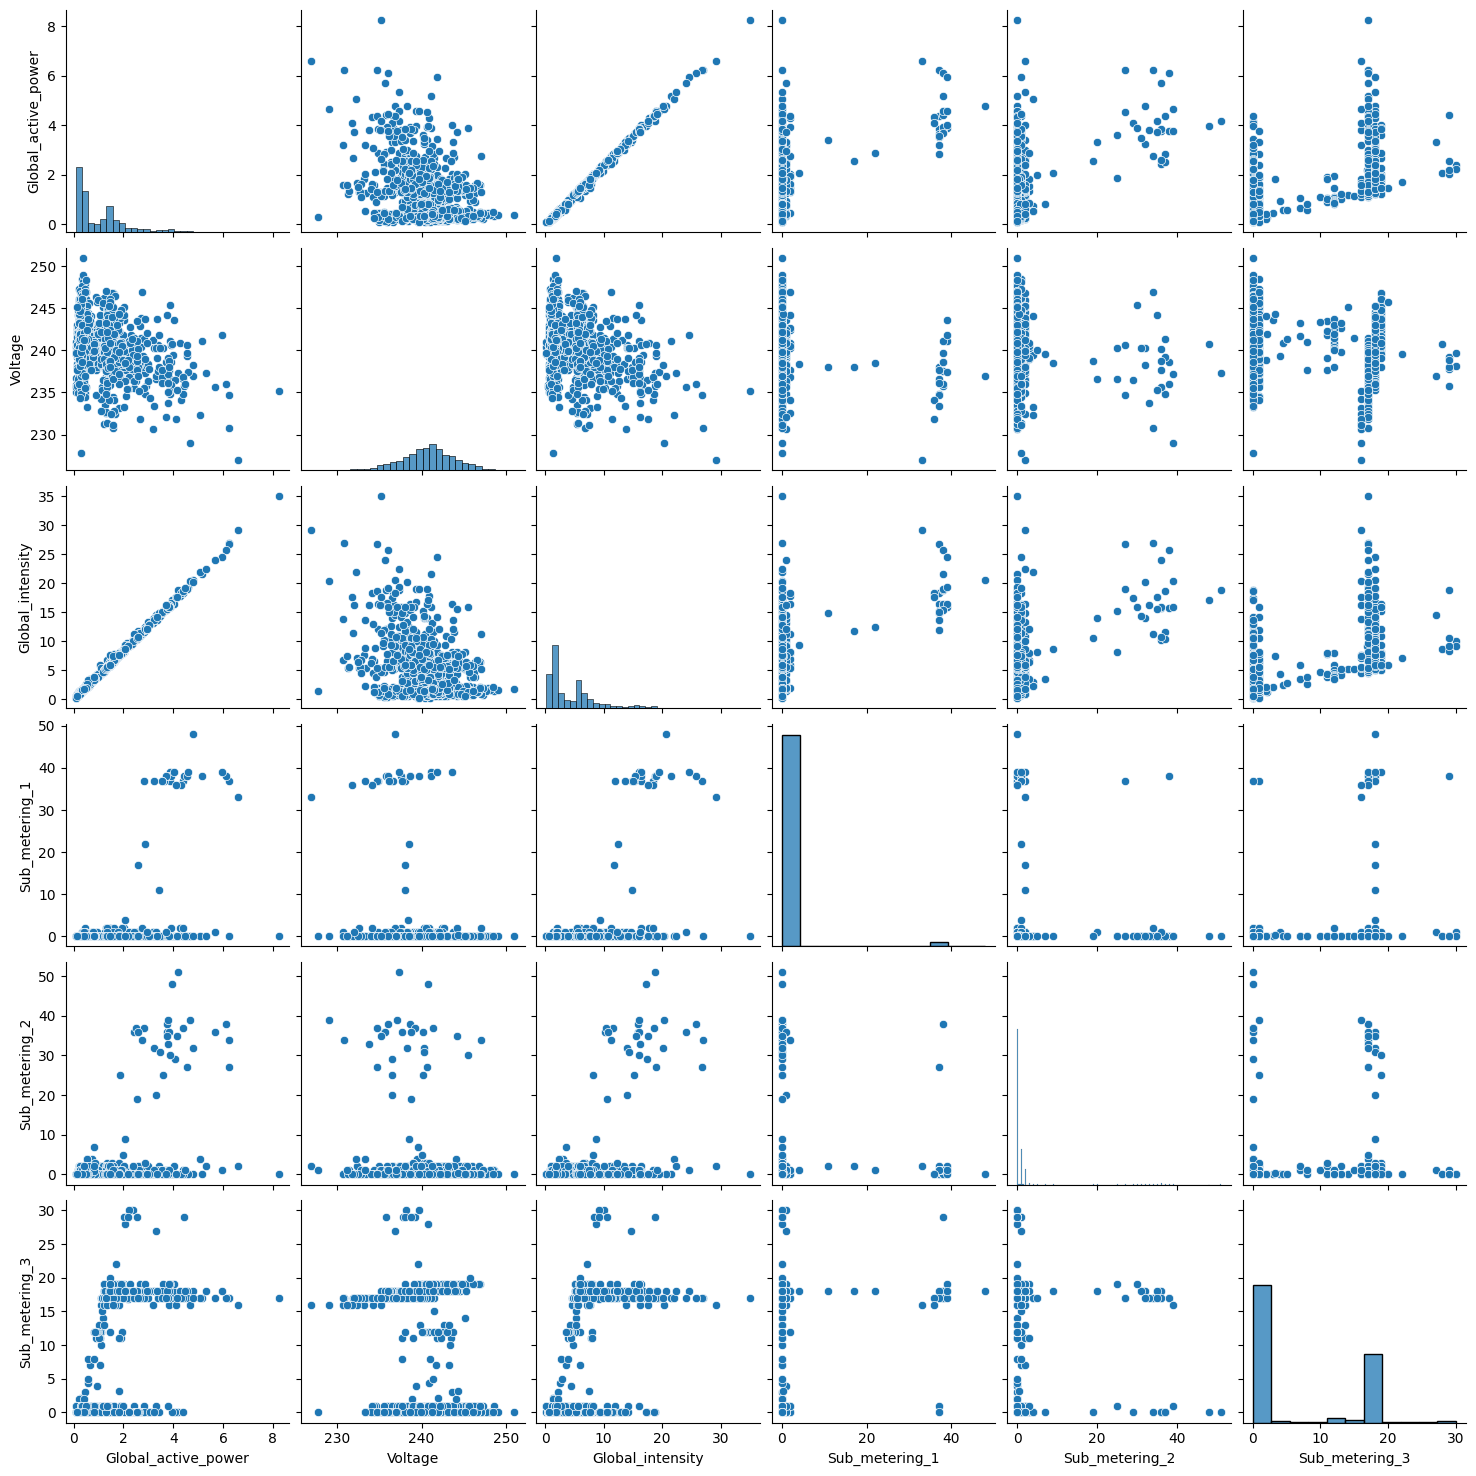

In [22]:
# Pairplot
sample_df = hpc.sample(1000)  # sampling for performance
sns.pairplot(sample_df[['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.show()

# Feature Engineering
hpc['Total_sub_metering'] = hpc['Sub_metering_1'] + hpc['Sub_metering_2'] + hpc['Sub_metering_3']
hpc['Unmetered_power'] = (hpc['Global_active_power'] * 1000 / 60) - hpc['Total_sub_metering']

**Insights from pairplot**

1. Strong positive correlation - Global active power Vs. Global Intensity. Forms a clear linear pattern. Proves -> P=VI
2. Weak Negative Correlation - Voltage Vs. Global active power. Slight drop in voltage can slightly increase power/current.
3. No Correlation - Sub_metering_1/2/3.
4. Global_active_power and Global_intensity are right-skewed.
5. Sub_metering values are often zero or low which shows certain appliances are rarely used or used for short durations.

**Outlier Detection and Treatment**
**Log Transformation**

c:\Users\sindh\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sindh\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


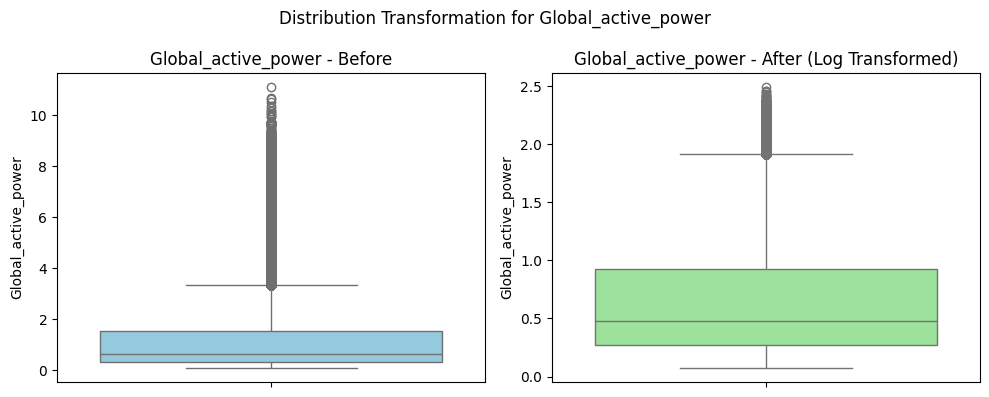

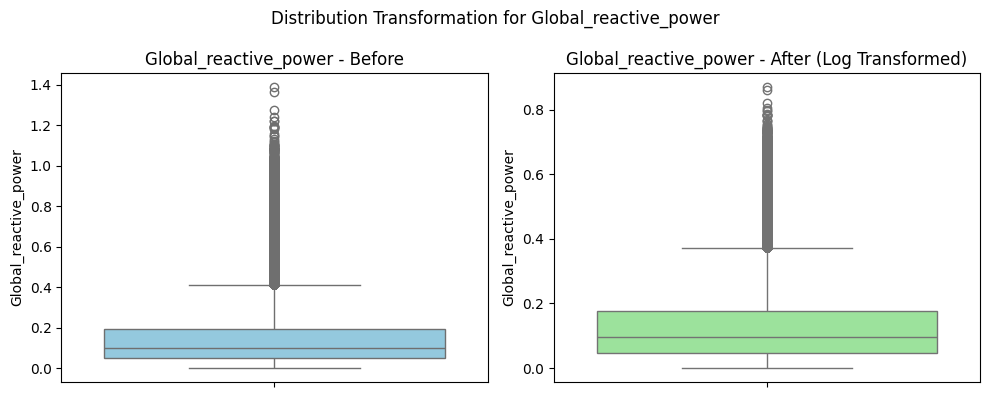

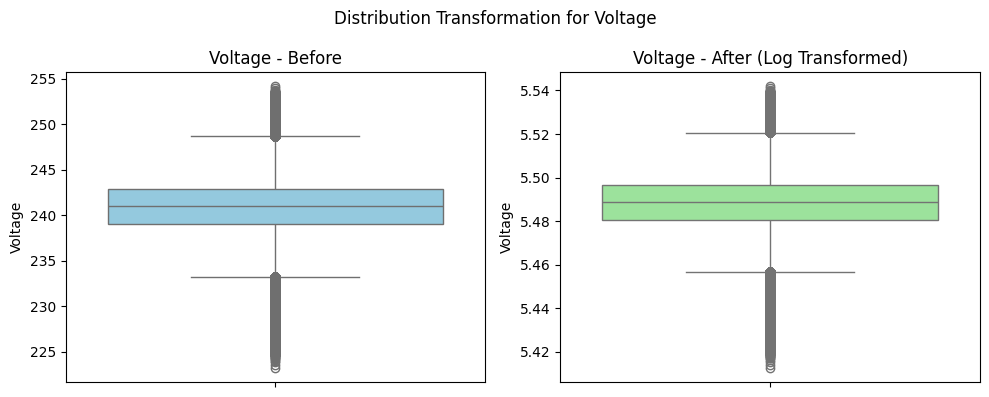

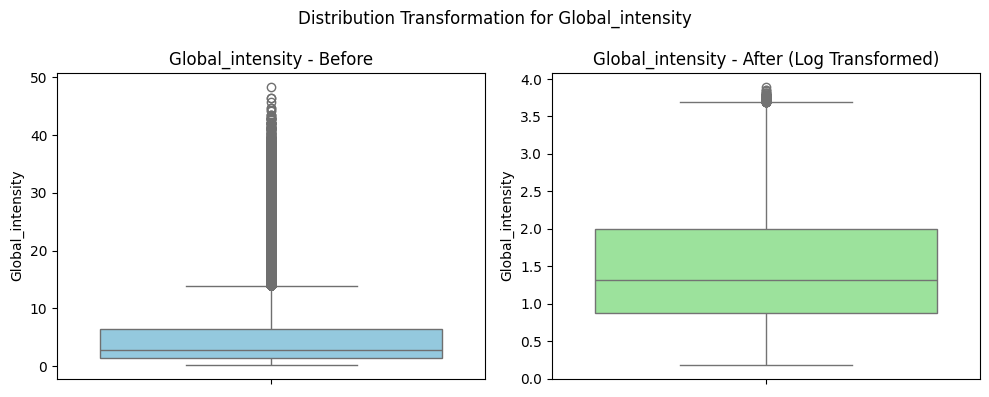

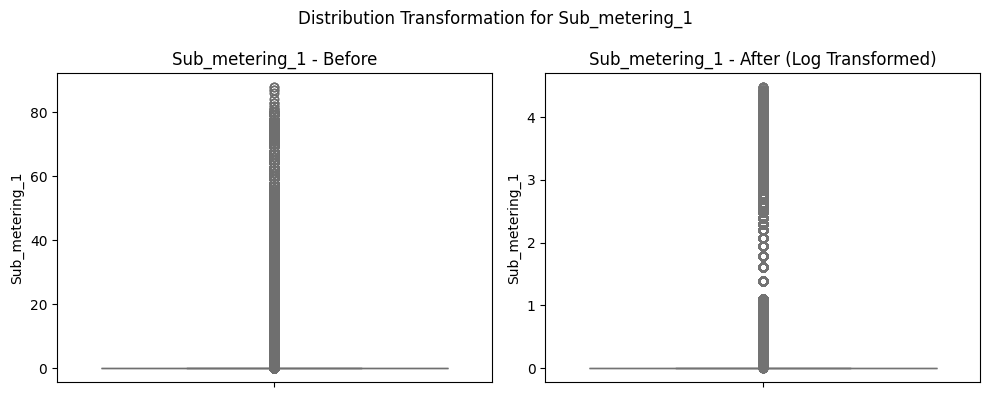

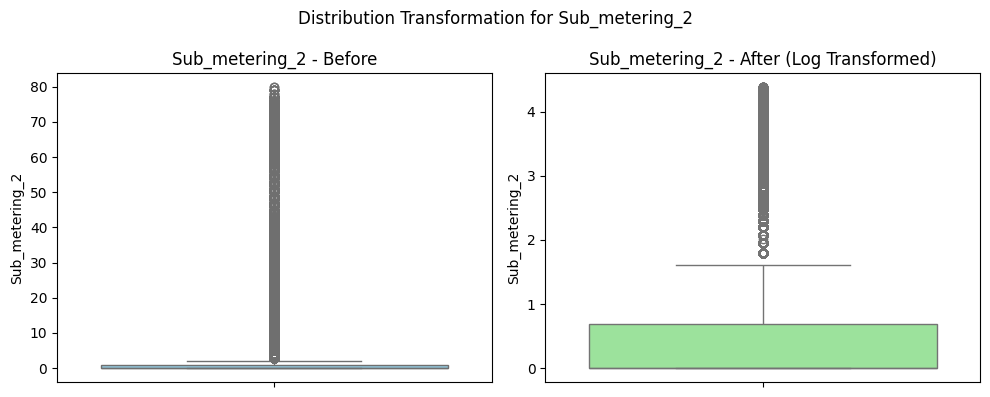

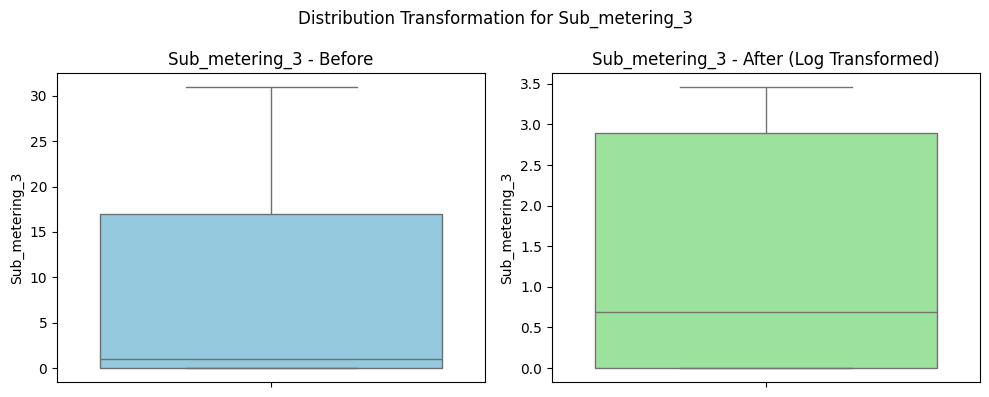

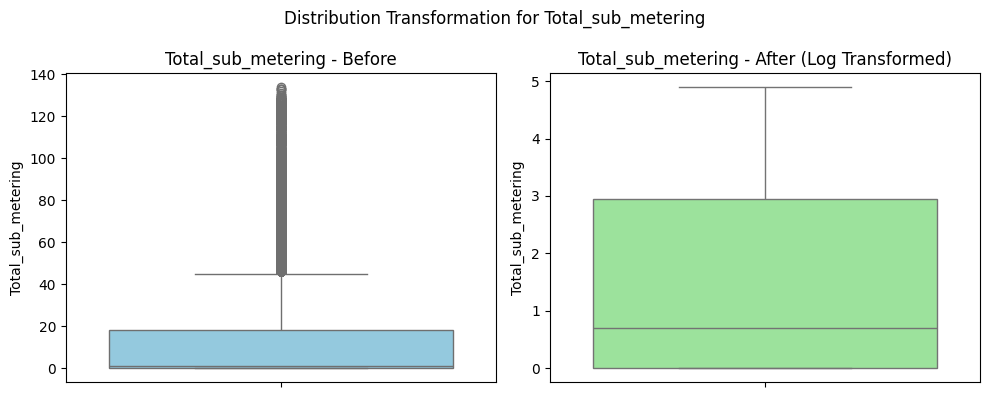

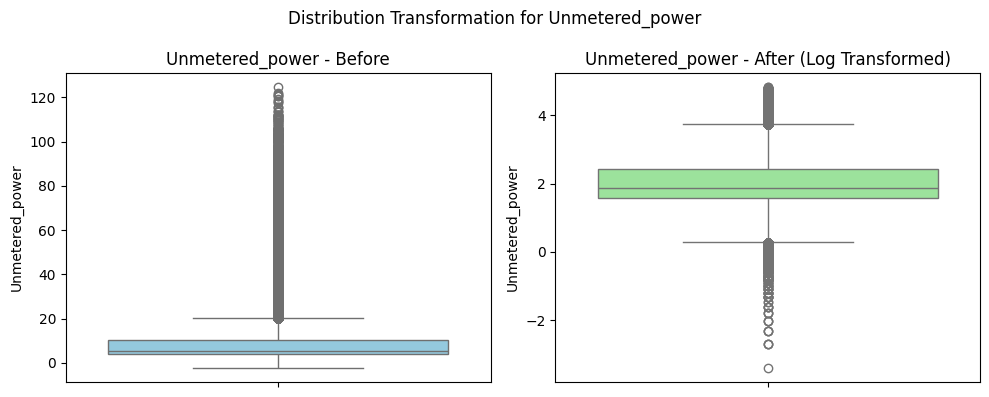

In [23]:
selected_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3', 'Total_sub_metering', 'Unmetered_power']

# Copy the original data
hpc_log_trans = hpc.copy()

# Apply log1p transformation safely
for col in selected_columns:
    if col in hpc_log_trans.columns:
        # Ensure data is numeric and non-negative
        hpc_log_trans[col] = pd.to_numeric(hpc_log_trans[col], errors='coerce')
        hpc_log_trans[col] = np.log1p(hpc_log_trans[col])

# Plot before and after transformation
for col in selected_columns:
    if col in hpc_log_trans.columns and hpc_log_trans[col].notna().any():
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        sns.boxplot(y=hpc[col], ax=axes[0], color='skyblue')
        axes[0].set_title(f'{col} - Before')

        sns.boxplot(y=hpc_log_trans[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'{col} - After (Log Transformed)')

        plt.suptitle(f'Distribution Transformation for {col}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plot for {col} due to invalid or empty data.")


In [24]:
hpc_log_trans

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,DayOfWeek,Month,Year,IsWeekend,Total_sub_metering,Unmetered_power
0,2006-12-16 17:24:00,1.651731,0.349247,5.463154,2.965273,0.0,0.693147,2.890372,17,2006-12-16,5,12,2006,1,2.944439,3.975311
1,2006-12-16 17:25:00,1.850028,0.361861,5.458010,3.178054,0.0,0.693147,2.833213,17,2006-12-16,5,12,2006,1,2.890372,4.295015
2,2006-12-16 17:26:00,1.852227,0.404131,5.456560,3.178054,0.0,1.098612,2.890372,17,2006-12-16,5,12,2006,1,2.995732,4.270629
3,2006-12-16 17:27:00,1.854421,0.406798,5.458479,3.178054,0.0,0.693147,2.890372,17,2006-12-16,5,12,2006,1,2.944439,4.287716
4,2006-12-16 17:28:00,1.540302,0.423960,5.466709,2.821379,0.0,0.693147,2.890372,17,2006-12-16,5,12,2006,1,2.944439,3.786460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.665776,0.000000,5.486580,1.609438,0.0,0.000000,0.000000,20,2010-11-26,4,11,2010,0,0.000000,2.819393
2075255,2010-11-26 20:59:00,0.664748,0.000000,5.484797,1.609438,0.0,0.000000,0.000000,20,2010-11-26,4,11,2010,0,0.000000,2.817403
2075256,2010-11-26 21:00:00,0.661657,0.000000,5.484050,1.568616,0.0,0.000000,0.000000,21,2010-11-26,4,11,2010,0,0.000000,2.811409
2075257,2010-11-26 21:01:00,0.659590,0.000000,5.483551,1.568616,0.0,0.000000,0.000000,21,2010-11-26,4,11,2010,0,0.000000,2.807393


In [25]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 
                    'Sub_metering_3', 'Total_sub_metering']

# Make a copy of the original DataFrame
scaled_data = hpc_log_trans.copy()

# Apply Standard Scaling to only the selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(scaled_data[columns_to_scale])

# Replace the original columns with scaled ones
scaled_data[columns_to_scale] = scaled_values

# scaled_data now contains scaled values + original 'Datetime' column (and others if any)
scaled_data.head()
scaled_data = scaled_data.drop(columns=['Unmetered_power'])


In [26]:
scaled_data.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,DayOfWeek,Month,Year,IsWeekend,Total_sub_metering
0,2006-12-16 17:24:00,2.374620,2.486124,-1.862927,2.138866,-0.236375,0.557586,1.306585,17,2006-12-16,5,12,2006,1,1.132215
1,2006-12-16 17:25:00,2.838736,2.618244,-2.246182,2.443422,-0.236375,0.557586,1.262688,17,2006-12-16,5,12,2006,1,1.091622
2,2006-12-16 17:26:00,2.843882,3.060978,-2.354230,2.443422,-0.236375,1.171717,1.306585,17,2006-12-16,5,12,2006,1,1.170727
3,2006-12-16 17:27:00,2.849017,3.088909,-2.211259,2.443422,-0.236375,0.557586,1.306585,17,2006-12-16,5,12,2006,1,1.132215
4,2006-12-16 17:28:00,2.113820,3.268667,-1.598020,1.932908,-0.236375,0.557586,1.306585,17,2006-12-16,5,12,2006,1,1.132215


**Linear Regression Model Building**

In [27]:
#Importing necessary modules and functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error,mean_absolute_error,r2_score

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def regression_metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    # adjusted R2
    n = len(y_true)
    p = traindata.shape[1]  # number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    # MAPE (avoid division by zero)
    # we add a small epsilon where y_true is zero
    eps = 1e-8
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Adj. R2': adj_r2,
        'MAPE': mape
    }


**MultiCollinearity Check with VIF Score**
1. This helps to identify the important features related to the target variable.

Case 1: When considering all the numeric variables, VIF score>10 for Global_Intensity, Sub_metering_3 and Total_sub_metering.

Case 2: When considering certain features randomly without those with higher VIF scores, it is good. So, we can take those combination of features for Linear Regression Model

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select only numeric columns (VIF expects float or int types only)
X = scaled_data.select_dtypes(include=['float64', 'int64']).copy()

# Compute VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 feature        VIF
0    Global_active_power  74.435480
1  Global_reactive_power   1.380909
2                Voltage   1.175191
3       Global_intensity  73.289779
4         Sub_metering_1   2.528059
5         Sub_metering_2   2.815160
6         Sub_metering_3  16.462502
7              IsWeekend   1.011216
8     Total_sub_metering  21.929988


In [29]:
X = scaled_data[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Hour','Month','IsWeekend']].copy()

# Compute VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 feature       VIF
0  Global_reactive_power  1.190474
1                Voltage  1.174181
2       Global_intensity  3.199217
3         Sub_metering_1  1.254527
4         Sub_metering_2  1.235161
5         Sub_metering_3  2.277708
6                   Hour  2.637811
7                  Month  2.614927
8              IsWeekend  1.337753


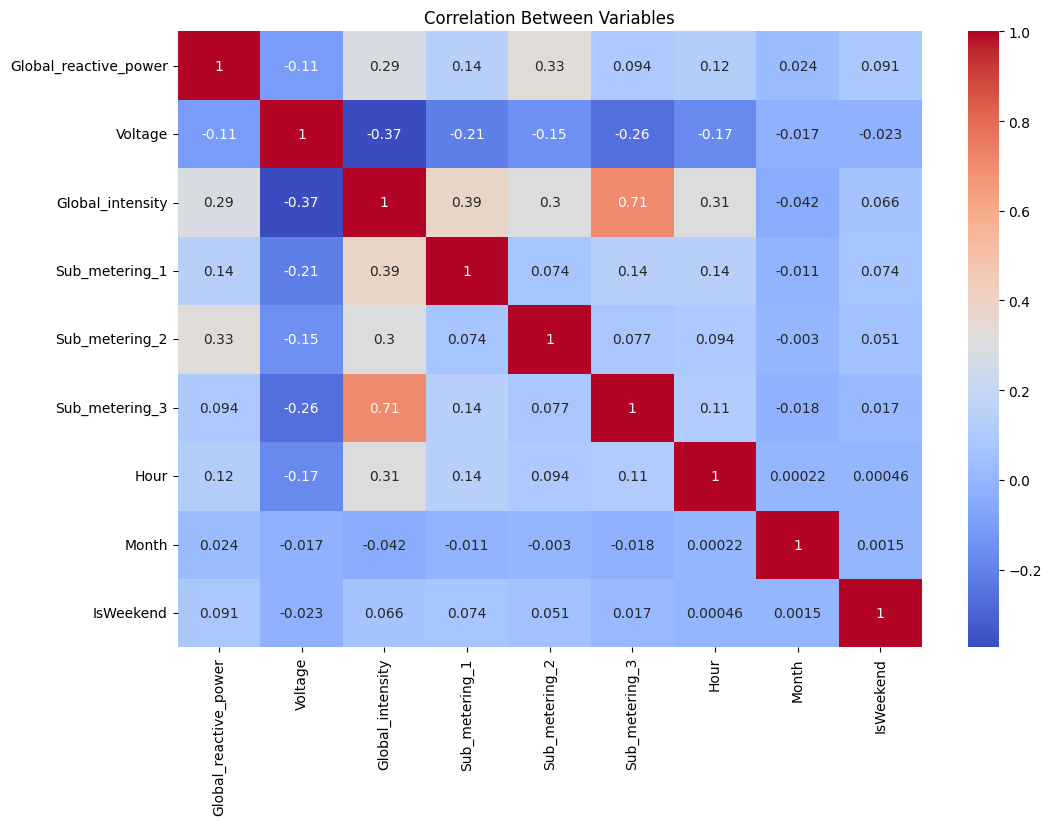

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

In [31]:
#Split X and Y - Dependent & Independant Variable
X = scaled_data[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Hour','Month','IsWeekend']]
Y = scaled_data[['Global_active_power']]

traindata, testdata, trainpd, testpd = train_test_split(X, Y, test_size= 0.20, random_state= 65)
model1 = LinearRegression()
model1.fit(traindata, trainpd)
tr_pred = model1.predict(traindata)
ts_pred = model1.predict(testdata)

#Print train vs test performance ---
train_metrics = regression_metrics(trainpd, tr_pred)
test_metrics  = regression_metrics(testpd, ts_pred)

print("TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nTEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")

TRAIN Metrics:
  MSE   : 0.0139
  RMSE  : 0.1180
  MAE   : 0.0888
  R2    : 0.9861
  Adj. R2: 0.9861
  MAPE  : 30.3653

TEST Metrics:
  MSE   : 0.0139
  RMSE  : 0.1177
  MAE   : 0.0887
  R2    : 0.9862
  Adj. R2: 0.9862
  MAPE  : 29.5026


| Metric   | Train  | Test   | What it means                                                                                          |
| -------- | ------ | ------ | ------------------------------------------------------------------------------------------------------ |
| **R²**   | 0.9861 | 0.9862 | 98.6% of the variance in Global\_active\_power is explained by your predictors-very high.              |
| **RMSE** | 0.1180 | 0.1177 | On average, your predictions are 0.12 units off (in whatever scale Global\_active\_power is measured). |
| **MAE**  | 0.0888 | 0.0887 | The average absolute error is ∼0.09 units.                                                             |
| **MAPE** | 30.37% | 29.50% | On average you’re off by nearly 30% of the true value-this is large in relative terms.                 |


**Visualizing the Residuals and Distribution of Target Variable**

**Testing the Assumptions Of Linear Regression Model**

| Assumptions   |  What it means                                                                                          |
| -------- | ------------------------------------------------------------------------------------------------------ |
| **The independent variables should not be correlated.**   | Holds true, however we find strong correlation between Global Intensity and Sub_metering_3. Both are directly proportional to target variable. So, as per the domain intuition, it looks fine.|
| **Homoscedastic nature** | Residuals forms a U shape pattern, no linearity is met.|
| **No Auto-correlation between the error terms**  | True and it is evident from the Durbin-Watsun test.|
| **Errors are assumed to be normally distributed** | True and it is evident from the Shapiro test, pvalue < 0.05.|


Durbin-Watson (Train): 1.9998
Durbin-Watson (Test) : 1.9964


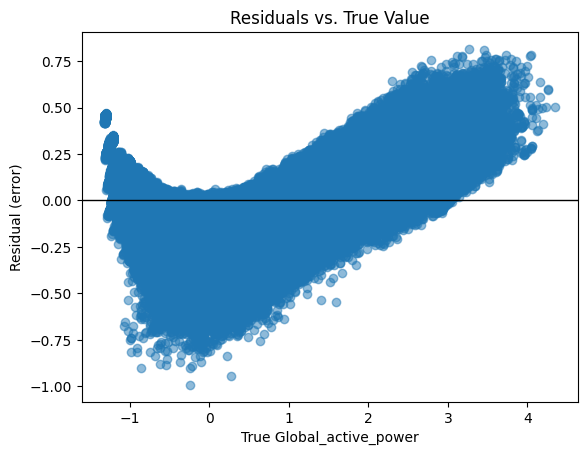

ShapiroResult(statistic=np.float64(0.8249022452767201), pvalue=np.float64(8.364045832044379e-159))

In [32]:
#Calculating Residuals
y_train_array = np.ravel(trainpd)       
y_pred_train_array = np.ravel(tr_pred)

y_test_array = np.ravel(testpd)
y_pred_test_array = np.ravel(ts_pred)

# Create result DataFrames
train_results = pd.DataFrame({
    'Actual': y_train_array,
    'Predicted': y_pred_train_array
})
train_results['Error'] = train_results['Actual'] - train_results['Predicted']

test_results = pd.DataFrame({
    'Actual': y_test_array,
    'Predicted': y_pred_test_array
})
test_results['Error'] = test_results['Actual'] - test_results['Predicted']

#Durbin-Watsun Test
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistics
dw_train = durbin_watson(train_results['Error'])
dw_test = durbin_watson(test_results['Error'])

print(f"Durbin-Watson (Train): {dw_train:.4f}")
print(f"Durbin-Watson (Test) : {dw_test:.4f}")

#Error vs. True value
#errors = testpd - ts_pred
errors = trainpd - tr_pred
plt.scatter(trainpd, errors, alpha=0.5)
plt.axhline(0, color='k', lw=1)
plt.xlabel("True Global_active_power")
plt.ylabel("Residual (error)")
plt.title("Residuals vs. True Value")
plt.show()

#Shapiro Test
from scipy.stats import shapiro
shapiro(np.abs(train_results['Error']))
shapiro(np.abs(test_results['Error']))

**Insights From Linear Regression Model**
**Residuals Vs. Global Active Power (Target Variable)**
1. U-shaped pattern: The residuals (errors) are positive at the very low and very high ends of true Global_active_power, but negative in the middle.
    Under-prediction at the extremes (model predicts too low when true power is very small or very large).
    Over-prediction in the mid-range.

2. Heteroscedasticity: The vertical spread of residuals changes with the level of true power. Ideally you’d see a horizontal cloud, but here you can see the fan- or U-shape, a clear violation of the “constant variance” assumption of Linear Regression.

3. Implication: Your model is systematically biased across the range-it can’t capture the non-linear relationship at very low or very high loads.

**Distribution of Global Active Power (Target Variable)**

1. Bimodal & right-skewed: You’ve got two “humps” in your histogram and a long tail to the right.

    One mode near a lower consumption regime (perhaps off-peak or nighttime usage).
    A second mode at higher consumption (peak hours).
    Then a tail stretching out to even larger values.

2. Negative values: You’re seeing some values below zero-this usually means you’ve transformed the data (e.g. a log-shift or standardization that yields negative numbers) or your original readings include small measurement noise around zero.

3. Implication: A single straight‐line model has trouble fitting a target that really behaves like two different regimes plus a skewed tail.Bimodal & right-skewed: You’ve got two “humps” in your histogram and a long tail to the right.

****Decision Tree Regressor Model Building****

In [33]:
from sklearn.tree import DecisionTreeRegressor

X = scaled_data[['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
Y = scaled_data['Global_active_power']
traindata, testdata, trainpd, testpd = train_test_split(X, Y, test_size= 0.20, random_state= 65)


model2 = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10,random_state=77)
model2.fit(traindata, trainpd)

tr_pred = model2.predict(traindata)
ts_pred = model2.predict(testdata)

train_metrics = regression_metrics(trainpd, tr_pred)
test_metrics  = regression_metrics(testpd, ts_pred)

print("TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nTEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")

TRAIN Metrics:
  MSE   : 0.0037
  RMSE  : 0.0607
  MAE   : 0.0447
  R2    : 0.9963
  Adj. R2: 0.9963
  MAPE  : 15.4423

TEST Metrics:
  MSE   : 0.0037
  RMSE  : 0.0607
  MAE   : 0.0448
  R2    : 0.9963
  Adj. R2: 0.9963
  MAPE  : 15.4879


| **Metric**         | **Train** | **Test** | **Insight**                                                                         |
| ------------------ | --------- | -------- | ----------------------------------------------------------------------------------- |
| **MSE**            | 0.0037    | 0.0037   | Very low error – model predicts with high precision.                                |
| **RMSE**           | 0.0607    | 0.0607   | Error magnitude is consistent between train and test – no overfitting.              |
| **MAE**            | 0.0447    | 0.0448   | Very small average absolute error in predictions.                                   |
| **R² (R-squared)** | 0.9963    | 0.9963   | Model explains 99.63% of the variance in the target variable.                       |
| **Adjusted R²**    | 0.9963    | 0.9963   | Same as R², indicating strong explanatory power with optimal number of predictors.  |
| **MAPE (%)**       | 15.44%    | 15.49%   | Good for energy data, though slightly above ideal (<10%) – can be improved further. |


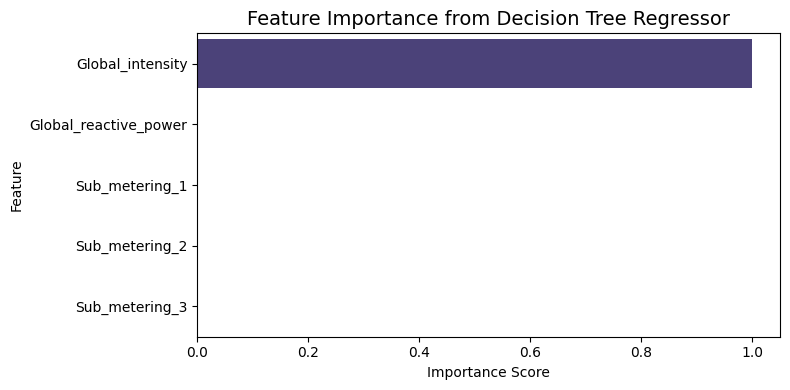

In [34]:
# Get feature importances from the trained model
feature_importances = model2.feature_importances_

# Match them to the column names
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Decision Tree Regressor', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**RandomForest Regressor Model Building**

In [35]:
from sklearn.ensemble import RandomForestRegressor

X = scaled_data[['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
Y = scaled_data['Global_active_power']
traindata, testdata, trainpd, testpd = train_test_split(X, Y, test_size= 0.20, random_state= 65)


model3 = RandomForestRegressor(n_estimators=100,random_state=77)
model3.fit(traindata, trainpd)

tr_pred = model3.predict(traindata)
ts_pred = model3.predict(testdata)

train_metrics = regression_metrics(trainpd, tr_pred)
test_metrics  = regression_metrics(testpd, ts_pred)

print("TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nTEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")

TRAIN Metrics:
  MSE   : 0.0011
  RMSE  : 0.0331
  MAE   : 0.0216
  R2    : 0.9989
  Adj. R2: 0.9989
  MAPE  : 7.1653

TEST Metrics:
  MSE   : 0.0014
  RMSE  : 0.0381
  MAE   : 0.0248
  R2    : 0.9986
  Adj. R2: 0.9986
  MAPE  : 9.0136


| **Metric**         | **Train** | **Test** | **Insight**                                                                         |
| ------------------ | --------- | -------- | ----------------------------------------------------------------------------------- |
| **MSE**            | 0.0011    | 0.0014   | Very low error – model predicts with high accuracy.                                 |
| **RMSE**           | 0.0331    | 0.0381   | Predictions are close to actuals.                                                   |
| **MAE**            | 0.0216    | 0.0248   | Small average absolute error, great generalization                                  |
| **R² (R-squared)** | 0.9989    | 0.9986   | Model explains 99.86% of the variance in the target variable. Excellent Performance.|
| **Adjusted R²**    | 0.9989    | 0.9986   | Same as R², indicating strong generalization.                                       |
| **MAPE (%)**       | 7.17%     | 9.01%    | Good, slightly above train data but within acceptable bounds.                       |


**Gradient Boosting Model Building**

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

X = scaled_data[['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
Y = scaled_data['Global_active_power']
traindata, testdata, trainpd, testpd = train_test_split(X, Y, test_size= 0.20, random_state= 65)

model4 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, max_depth=3,random_state=77)
model4.fit(traindata, trainpd)

tr_pred = model4.predict(traindata)
ts_pred = model4.predict(testdata)

train_metrics = regression_metrics(trainpd, tr_pred)
test_metrics  = regression_metrics(testpd, ts_pred)

print("TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nTEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")

TRAIN Metrics:
  MSE   : 0.0016
  RMSE  : 0.0404
  MAE   : 0.0280
  R2    : 0.9984
  Adj. R2: 0.9984
  MAPE  : 10.0457

TEST Metrics:
  MSE   : 0.0016
  RMSE  : 0.0403
  MAE   : 0.0280
  R2    : 0.9984
  Adj. R2: 0.9984
  MAPE  : 10.2782


| **Metric**         | **Train** | **Test** | **Insight**                                                                         |
| ------------------ | --------- | -------- | ----------------------------------------------------------------------------------- |
| **MSE**            | 0.0016    | 0.0016   | Very low error – model predicts better than RF.                                     |
| **RMSE**           | 0.0404    | 0.0403   | Consistent with training, no overfitting.                                           |
| **MAE**            | 0.0280    | 0.0280   | Stable model.                                                                       |
| **R² (R-squared)** | 0.9984    | 0.9984   | Model explains 99.84% of the variance in the target variable. Excellent Performance.|
| **Adjusted R²**    | 0.9984    | 0.9984   | Same as R², indicating strong generalization.                                       |
| **MAPE (%)**       | 10.04%    | 10.27%   | Good, slightly above train data but within acceptable bounds.                       |


**Extended Gradient Boost Model Building**

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from xgboost import XGBRegressor, plot_importance
X = scaled_data[['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
Y = scaled_data['Global_active_power']
traindata, testdata, trainpd, testpd = train_test_split(X, Y, test_size= 0.20, random_state= 65)
model5 = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=0.8,colsample_bytree=0.8,random_state=42)
model5.fit(traindata, trainpd)

tr_pred = model5.predict(traindata)
ts_pred = model5.predict(testdata)

train_metrics = regression_metrics(trainpd, tr_pred)
test_metrics  = regression_metrics(testpd, ts_pred)

print("TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nTEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")

TRAIN Metrics:
  MSE   : 0.0028
  RMSE  : 0.0528
  MAE   : 0.0366
  R2    : 0.9972
  Adj. R2: 0.9972
  MAPE  : 13.6079

TEST Metrics:
  MSE   : 0.0028
  RMSE  : 0.0527
  MAE   : 0.0366
  R2    : 0.9972
  Adj. R2: 0.9972
  MAPE  : 13.3230


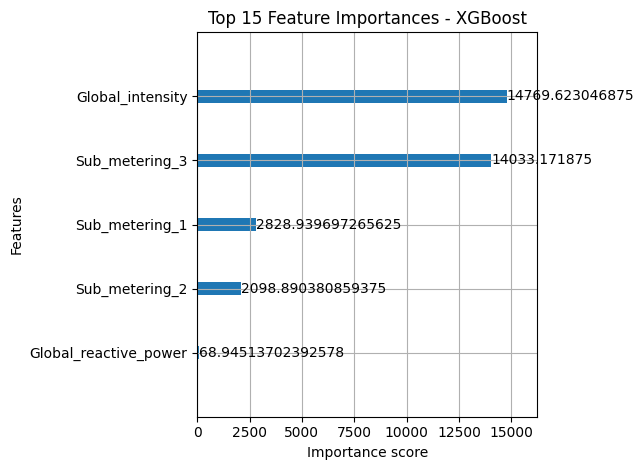

In [39]:
#Feature Importance
plot_importance(model5, importance_type='gain', max_num_features=5)
plt.title('Top 15 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

| **Metric**         | **Train** | **Test** | **Insight**                                                                         |
| ------------------ | --------- | -------- | ----------------------------------------------------------------------------------- |
| **MSE**            | 0.0028    | 0.0028   | Very low error – model predicts better than RF/GB.                                  |
| **RMSE**           | 0.0528    | 0.0527   | Consistent with training, no overfitting.                                           |
| **MAE**            | 0.0366    | 0.0366   | Stable model.                                                                       |
| **R² (R-squared)** | 0.9972    | 0.9972   | Model explains 99.72% of the variance in the target variable. Excellent Performance.|
| **Adjusted R²**    | 0.9972    | 0.9972   | Same as R², indicating strong generalization.                                       |
| **MAPE (%)**       | 13.60%    | 13.32%   | Good, Test score is slightly below train data but fine.                             |


In [40]:
# Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0.5, 1, 1.5],
    'reg_alpha': [0, 0.5, 1]
}

from sklearn.model_selection import RandomizedSearchCV
ran_search = RandomizedSearchCV(estimator=model5,param_distributions=param_dist,n_iter=30,scoring='r2',cv=3,verbose=1,n_jobs=-1,random_state=42)
ran_search.fit(traindata, trainpd)

model5a = ran_search.best_estimator_
print("Best Parameters:", ran_search.best_params_)

# Predict with best model
tr_pred = model5a.predict(traindata)
ts_pred = model5a.predict(testdata)

# Evaluate
train_metrics = regression_metrics(trainpd, tr_pred)
test_metrics = regression_metrics(testpd, ts_pred)

print("\nTUNED XGBOOST - TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nTUNED XGBOOST - TEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}

TUNED XGBOOST - TRAIN Metrics:
  MSE   : 0.0014
  RMSE  : 0.0379
  MAE   : 0.0255
  R2    : 0.9986
  Adj. R2: 0.9986
  MAPE  : 8.9262

TUNED XGBOOST - TEST Metrics:
  MSE   : 0.0014
  RMSE  : 0.0381
  MAE   : 0.0256
  R2    : 0.9986
  Adj. R2: 0.9986
  MAPE  : 9.1679


**Neural Network Model**

In [41]:
from sklearn.neural_network import MLPRegressor

# Features and Target
X = scaled_data[['Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
Y = scaled_data['Global_active_power']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=65)

# MLP Regressor Model
model6 = MLPRegressor(hidden_layer_sizes=(64, 32),activation='relu',solver='adam',learning_rate='adaptive',max_iter=500,random_state=42)

# Train the model
model6.fit(X_train, y_train)

# Predict
train_pred = model6.predict(X_train)
test_pred = model6.predict(X_test)

# Evaluate
train_metrics = regression_metrics(y_train, train_pred)
test_metrics = regression_metrics(y_test, test_pred)

print("\nMLP NEURAL NETWORK - TRAIN Metrics:")
for k, v in train_metrics.items():
    print(f"  {k:6}: {v:.4f}")

print("\nMLP NEURAL NETWORK - TEST Metrics:")
for k, v in test_metrics.items():
    print(f"  {k:6}: {v:.4f}")


MLP NEURAL NETWORK - TRAIN Metrics:
  MSE   : 0.0017
  RMSE  : 0.0409
  MAE   : 0.0298
  R2    : 0.9983
  Adj. R2: 0.9983
  MAPE  : 10.5792

MLP NEURAL NETWORK - TEST Metrics:
  MSE   : 0.0017
  RMSE  : 0.0409
  MAE   : 0.0298
  R2    : 0.9983
  Adj. R2: 0.9983
  MAPE  : 10.5499


| **Metric**         | **Train** | **Test** | **Insight**                                                                         |
| ------------------ | --------- | -------- | ----------------------------------------------------------------------------------- |
| **MSE**            | 0.0017    | 0.0017   | Very low error – model predicts better.                                  |
| **RMSE**           | 0.0409    | 0.0409   | Consistent with training, no overfitting.                                           |
| **MAE**            | 0.0298    | 0.0298   | Stable model.                                                                       |
| **R² (R-squared)** | 0.9983    | 0.9983   | Model explains 99.83% of the variance in the target variable. Excellent Performance.|
| **Adjusted R²**    | 0.9983    | 0.9983   | Same as R², indicating strong generalization.                                       |
| **MAPE (%)**       | 10.57%    | 10.54%   | Good, Test score is slightly below train data but fine.                             |
